## Nzambuli Daniel
### Task on PCA
#### Using Malnet Images

In [1]:
# read the file names in the folder
import os

In [2]:
# file names within val folder
path = r".\Data\val"
folders = [file for file in os.listdir(path) if os.path.isdir(os.path.join(path, file))]

In [3]:
print(*folders, sep=',')

addisplay,adload,adsware,adware++adware,adware++grayware++virus,adware++virus,adwareare,backdoor,banker++trojan,click,clicker,clicker++trojan,clickfraud++riskware,downloader,dropper++trojan,exploit,fakeangry,fakeapp,fakeapp++trojan,fakeinst++trojan,genbl,gray,hacktool,malware,malware++trj,monitor,ransom++trojan,risktool++riskware++virus,riskware++smssend,rog,rootnik++trojan,smssend,smssend++trojan,spr,spy,spy++trojan,spyware,trj,troj,trojandownloader,trojandropper,virus,worm


In [4]:
# use img from PIL to read the images
from PIL import Image as im

In [5]:
folders[0][0:]

'addisplay'

In [33]:
# read all the images
images = []

# files inside addisplay
in_path = path + '\\' + str(folders[0][0:])
# ittereate every folder in the train data 
for file in os.listdir(in_path):
    new_path = in_path + '\\' + str(file)
    for img in os.listdir(new_path):
#     the new file path
        img_path = os.path.join(new_path, img)
#     try reading the images
        try:
            pic = im.open(img_path)
            pic = np.array(pic)
            images.append(pic)
        except:
            print(f"Can't open: {img_path}")


In [7]:
len(images)

1746

In [8]:
# perform pca analysis on the 1746 images

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [13]:
# flatten the images
import matplotlib.image as mpimg

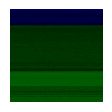

In [34]:
numImages = len(images)
Images = np.array(images)
tileSize = plt.figure(figsize = (7, 7))
imgData = []
for image in Images:
    img = image
    ax = tileSize.add_subplot(5,5, i+1)
    plt.imshow(img)
    plt.axis('off')
    # flatten images
    imgData.append(img.flatten())

In [35]:
# pca data 
pca_data = np.array(imgData)
# pca with 2 key components 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data)

In [36]:
# retrieve the results
pca_result

array([[ 1257.19263506,  -964.60877455],
       [  948.27313578, -2679.5395415 ],
       [ 1540.07941519, -2346.31360918],
       ...,
       [ 1970.69356969, -2392.94771636],
       [ 4178.29083925,  -772.47664592],
       [ 1537.27519099, -2248.77120642]])

In [38]:
# convert to Dataframe 
projected = pd.DataFrame(pca_result, columns = ['pc1', 'pc2'], index =range(1, numImages + 1))
projected

,pc1,pc2
1,1257.192635,-964.608775
2,948.273136,-2679.539542
3,1540.079415,-2346.313609
4,498.468059,-1694.333069
5,1209.315428,-1141.214437
...,...,...
1742,821.275310,278.079850
1743,3267.611260,-911.173658
1744,1970.693570,-2392.947716
1745,4178.290839,-772.476646


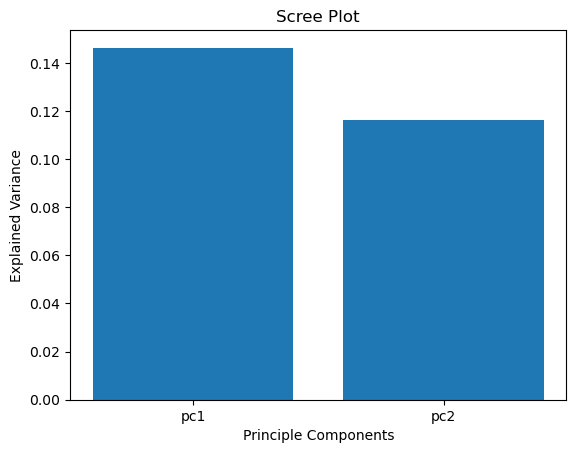

In [39]:
# plot findings
var = pca.explained_variance_ratio_

# scree plot of pc1 and pc2
plt.bar(['pc1', 'pc2'], var)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

## Interpretation
the components selected to be PC1 contribute the approximately ```54%``` of the factors that can be used to group similar images.
